<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Copy_of_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [33]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

In [4]:
#first centering/standardizing data
Z = df.copy().drop(['id','Unnamed: 32'],axis=1)
for col in Z.columns:
  Z[col]=(Z[col]-Z[col].mean())/Z[col].std()
  
Z.head()
  

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


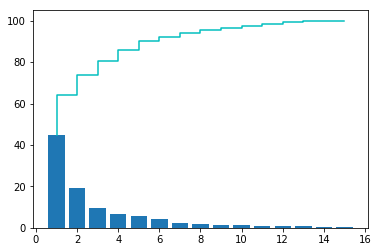

In [85]:
#scree plot to see principa component importance
from numpy import array
from sklearn.decomposition import PCA
n = len(Z.columns)
pca_scree = PCA(int(n/2))
pca_scree.fit(Z)
pca_scree.explained_variance_
pca_scree_df = pd.DataFrame(pca_scree.explained_variance_)
pca_scree_df.columns = ['Explained Variance']
pca_scree_df['Explained Variance'] = 100*pca_scree_df['Explained Variance']/pca_scree_df['Explained Variance'].sum()
pca_scree_df['Explained Variance Ratio Cumulative'] = pca_scree_df['Explained Variance'].cumsum()
pca_scree_df['Number of Principal Components'] = pca_scree_df.index+1
plt.bar(pca_scree_df['Number of Principal Components'],pca_scree_df['Explained Variance'])
plt.step(pca_scree_df['Number of Principal Components'],pca_scree_df['Explained Variance Ratio Cumulative'],c='c');

In [86]:
# we can see from the scree plot we get about 90% of explained variance from 6 features so let's go with that
pca_scree_df['Explained Variance Ratio Cumulative'].head(6)

0    44.878417
1    64.109447
2    73.631268
3    80.323832
4    85.894875
5    89.974521
Name: Explained Variance Ratio Cumulative, dtype: float64

In [94]:
#using 6 principal components
pca = PCA(6)
pca.fit(Z)


PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [95]:
#checking eigenvalues of pca
pca.explained_variance_

array([13.28160768,  5.69135461,  2.81794898,  1.98064047,  1.64873055,
        1.20735661])

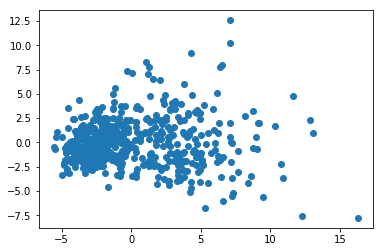

In [96]:
#looking at scatter of transformed data
ZT = pca.transform(Z)
plt.scatter(ZT[:,0],ZT[:,1]);

In [209]:
#using sklearn to find clusters
Z_pca = pd.DataFrame([ZT[:,0],ZT[:,1]]).T
Z_pca.columns=['x','y']
from sklearn.cluster import KMeans 
Z_pca.head()



,x,y
0,9.184755,1.946870
1,2.385703,-3.764859
2,5.728855,-1.074229
3,7.116691,10.266556
4,3.931842,-1.946359


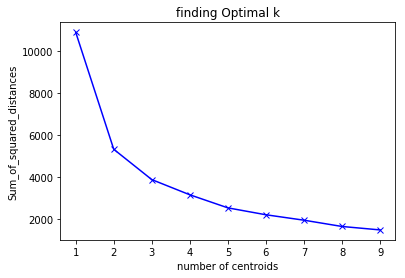

In [105]:
#usign elbow plot to determine best number of clusters
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Z_pca)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('number of centroids')
plt.ylabel('Sum_of_squared_distances')
plt.title('finding Optimal k')
plt.show()

In [211]:
#looks like 4 centroids will do for us
n = 3
kmeans = KMeans(n_clusters=n)
kmeans.fit(Z_pca)
labels = kmeans.labels_
Z_pca['cluster'] = pd.Series(labels)
Z_pca.head()

,x,y,cluster
0,9.184755,1.946870,1
1,2.385703,-3.764859,1
2,5.728855,-1.074229,1
3,7.116691,10.266556,2
4,3.931842,-1.946359,1


In [212]:
Z_pca['cluster'].value_counts()

0    351
1    123
2     95
Name: cluster, dtype: int64

In [213]:
centroid_list = []
colors=['g','b','k']
for i in range (0,n):
  temp = (Z_pca[Z_pca['cluster']==i].mean()[0],Z_pca[Z_pca['cluster']==i].mean()[1],colors[i])
  centroid_list.append(temp)

centroid_list

[(-2.362460460107272, -0.25519870307810216, 'g'),
 (5.054583609193433, -1.738886117996476, 'b'),
 (2.18431407965116, 3.194291971515585, 'k')]

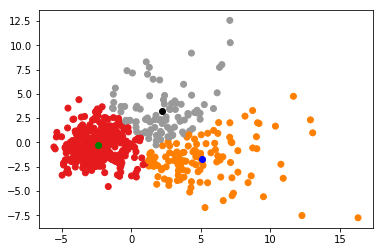

In [214]:
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap('Set1')
plt.scatter(Z_pca['x'],Z_pca['y'],c=Z_pca['cluster'],cmap=cm)
#plt.scatter(x0_mean,y0_mean,color='lightgreen')
#plt.scatter(x1_mean,y1_mean,color='r');

for j in range(0,n):
  plt.scatter(centroid_list[j][0],centroid_list[j][1],color=centroid_list[j][2])

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.

In [142]:
#now let's compare our clusters vs original data set
check_df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
check_df.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


In [199]:
plot_df = pd.DataFrame(check_df['diagnosis'].copy())
plot_df['my cluster'] = Z_pca['cluster']
#plot_df['ones']=1
plot_df.head()

,diagnosis,my cluster
0,M,2
1,M,2
2,M,2
3,M,1
4,M,2


In [206]:
barplot = pd.crosstab(plot_df['diagnosis'],plot_df['my cluster'])
barplot

my cluster,0,1,2
diagnosis,,,
B,319,38,0
M,27,59,126


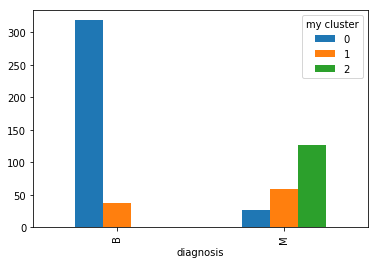

In [208]:
barplot.plot(kind='bar');

we can see that my cluster 0 almost always coincides with B, while my clusters 1 and 2 are mostly in M.  

In [0]:
#let's write a function to do this for generic PCA components, and clusters

def optimizer(data,compenents, clusters):
  data_temp = data.copy()
  
  pca_temp = PCA(compenents)
  pca_temp.fit(data_temp)
  
  data_transf = pca_temp.transform(data_temp)
  
  data_pca_temp = pd.DataFrame([data_transf[:,0],data_transf[:,1]]).T
  data_pca_temp.columns=['x','y']
  
  kmeans_temp = KMeans(n_clusters=clusters)
  kmeans_temp.fit(data_pca_temp)
  labels_temp = kmeans_temp.labels_
  data_pca_temp['cluster'] = pd.Series(labels_temp)
  
  check_df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
  plot_df_temp = pd.DataFrame(check_df['diagnosis'].copy())
  plot_df_temp['my cluster'] = data_pca_temp['cluster']
  
  barplot_temp = pd.crosstab(plot_df_temp['diagnosis'],plot_df_temp['my cluster'])
  
  print(barplot_temp)
  barplot_temp.plot(kind='bar');

my cluster    0    1
diagnosis           
B            16  341
M           175   37


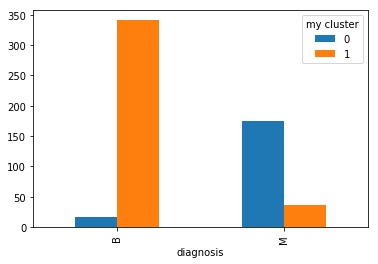

In [223]:
#try stripped down version with 2 components
optimizer(Z,2,2)

my cluster    0    1
diagnosis           
B            16  341
M           175   37


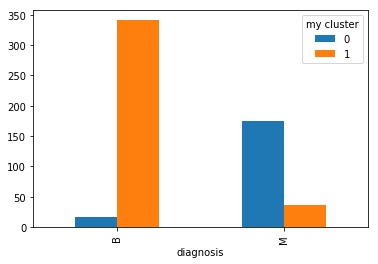

In [224]:
#try lost of components but only  2 clusters 
optimizer(Z,15,2)

my cluster   0    1    2   3   4   5
diagnosis                           
B            0  180  123  34   0  20
M           85    4    1  57  26  39


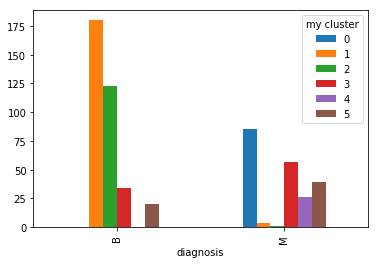

In [225]:
#try few components but many clusters 
optimizer(Z,2,6)

my cluster   0    1   2   3   4   5   6   7  8    9
diagnosis                                          
B           55  111   0   0   4  13  34   0  9  131
M            1    2  15  69  35  31  37  17  4    1


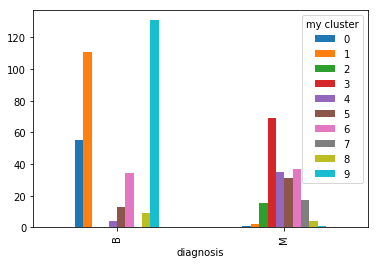

In [232]:
#try losts of both
optimizer(Z,15,10)

In [0]:
# it really looks like there is not much to be gained here going beyond the bare minimum, i.e. 2 components 
#and2 clusters.  However this situation is slightly different as is diagnosis, so you have to be very 
#careful not to mis diagnose M as a B.  in the last plot you can see 0,1 and 9 are always B, while 2,3,4 and 7 are
#always M.  for something like 5,6 or 8 which is evenly split you could do more tests